# Artificial Neural Network (ANN) Fundamentals for Regression & Classification

This project began with a simple yet essential goal: to build, train, and evaluate an Artificial Neural Network (ANN) model using Keras to solve classification problems, both in binary and multi-class cases. As a first step, the synthetic dataset make_moons was used to test the ANN's ability to handle non-linear data patterns in binary classification. The entire process began with data loading, dividing the dataset into training and test data, feature normalization, and creating an appropriate ANN model architecture.

Learning outcomes were analyzed using accuracy metrics, classification reports, confusion matrices, and decision boundaries, which visually show class boundaries. After mastering the process for the binary case, the project continued with a multi-class challenge using the Iris dataset. Here, the process of encoding labels into one-hot vectors was a crucial step in adapting the ANN model to the multi-class target format. Accuracy curve visualization, target vs. prediction comparison tables, and confusion matrix analysis concluded the evaluation phase.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Manual ANN for Regression (NumPy)

We will manually create an Artificial Neural Network (ANN) model using only NumPy to predict numerical values (regression). The chosen case study is predicting a sine wave pattern with noise. The goal is to understand the basic ANN flow (forward pass, backpropagation, weight update) without the aid of high-level libraries like Keras or PyTorch.

## Artificial data for regression
Data is created synthetically using the equation y=sin(x)+noise.
Reasons for using artificial data:
* The patterns are clear and easy to visualize.
* The complexity and amount of data can be controlled.
* Suitable for learning basic concepts before attempting real-world datasets.

In [21]:
np.random.seed(42)
X = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(*X.shape)

In [22]:
y.shape

(200, 1)

In [23]:
df = pd.DataFrame({
    'X': X.flatten(),
    'y': y.flatten()
})
df

,X,y
0,-6.283185,0.049671
1,-6.220038,0.049279
2,-6.156890,0.190729
3,-6.093743,0.340615
4,-6.030595,0.226498
...,...,...
195,6.030595,-0.211381
196,6.093743,-0.276697
197,6.156890,-0.110587
198,6.220038,-0.057285


## Artificial data visualization
Create a scatterplot of data points from a sine function with noise and compare it to a pure sine curve. The goal is to visualize the shape of the data that will be used in ANN training.

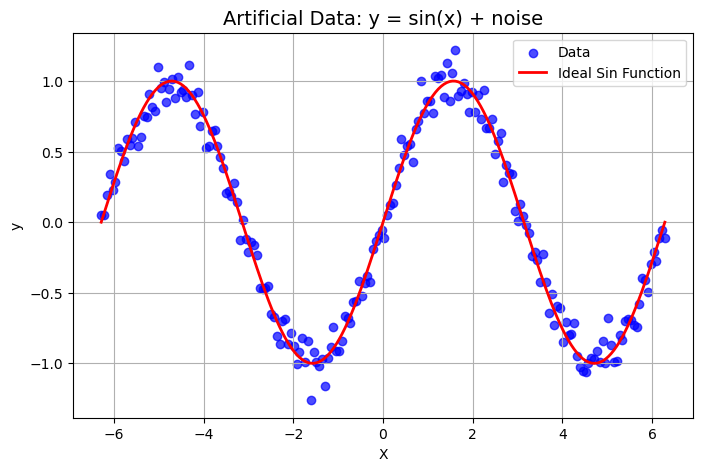

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(df['X'], df['y'], color='blue', alpha=0.7, label='Data')
plt.plot(df['X'], np.sin(df['X']), color='red', linewidth=2, label='Ideal Sin Function')
plt.title("Artificial Data: y = sin(x) + noise", fontsize=14)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Normalization
Feature X is normalized using `StandardScaler` to have a mean of 0 and a standard deviation of 1. This helps the ANN learn more stably and quickly, as the data scale becomes uniform.

In [26]:
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

## Split data
The dataset is split into a training set and a testing set using `train_test_split`. The training data is used to train the model, while the testing data is used to measure the model's performance on unseen data.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Manual ANN architecture with 1 hidden layer (10 neurons, ReLU), 1 neuron output

In [28]:
input_dim = X_train.shape[1]
hidden_neurons = 10
output_dim = 1
lr = 0.01
epochs = 500

## Weight initialization
The weights (W1, W2) are randomly initialized, and the biases (b1, b2) are initialized to zero. Random initialization helps the model begin the learning process without symmetry between neurons.

In [29]:
W1 = np.random.randn(input_dim, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_dim)
b2 = np.zeros((1, output_dim))

In [30]:
losses = []

## Model learning
Iterations (for epochs in range (epochs)) will be performed to train the model:
* Forward pass: calculate the output from input → hidden layer → output.
* Calculate the loss (MSE).
* Backward pass (backpropagation): calculate the derivative of the loss with respect to the weights.
* Update the weights with gradient descent using a learning rate of 0.01.

In [31]:
for epoch in range(epochs):
    # Forward pass
    z1 = X_train @ W1 + b1
    a1 = np.maximum(0, z1)  # ReLU
    z2 = a1 @ W2 + b2
    y_pred = z2

    # Calculate loss (MSE)
    loss = np.mean((y_pred - y_train) ** 2)
    losses.append(loss)

    # Backpropagation
    dloss_dy = 2 * (y_pred - y_train) / y_train.shape[0]
    dW2 = a1.T @ dloss_dy
    db2 = np.sum(dloss_dy, axis=0, keepdims=True)

    da1 = dloss_dy @ W2.T
    dz1 = da1.copy()
    dz1[z1 <= 0] = 0
    dW1 = X_train.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weight
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

## Loss Plot
A loss per epoch graph is created to monitor the learning process. A decrease in loss indicates that the learning model is adjusting its weights to bring predictions closer to the target.

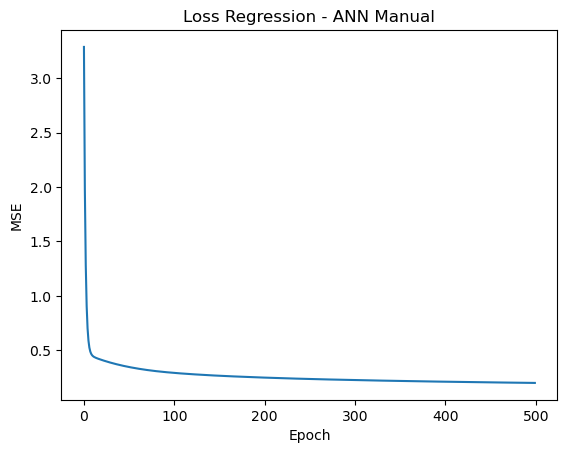

In [32]:
plt.plot(losses)
plt.title("Loss Regression - ANN Manual")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

### Interpretation
* Sharp drop at the beginning (epochs 0–50) → the model quickly learns basic patterns from the data.
* Slower drop afterward → the model fine-tunes the weights to gradually reduce the error.
* Loss stabilizes starting around epochs 200–300 → the learning process has almost reached its optimal point; there is no longer a significant drop.
* Small final MSE value (<0.3) → indicates the model is quite capable of learning the relationship between X and y in the training data.

## Forward pass on the test set
After training, the model performs a forward pass on the testing data to generate predictions. There is no backpropagation at this stage, only output calculations.

In [33]:
z1_test = X_test @ W1 + b1
a1_test = np.maximum(0, z1_test)
y_pred_test = a1_test @ W2 + b2

In [34]:
y_pred_test.flatten()

array([ 0.0581018 ,  0.5507339 ,  0.34552219, -0.14384434,  0.34736001,
        0.44543454, -0.18802825, -0.34032608, -0.40582   ,  0.14031048,
       -0.14698591, -0.53680783, -0.25845869, -0.31115528, -0.60230174,
       -0.45494043, -0.0101781 , -0.04560347, -0.34002014, -0.17434747,
        0.41285393,  0.53705312,  0.01989044, -0.02381022, -0.13330513,
       -0.06490123, -0.31835464, -0.16066669,  0.39648045,  0.2818661 ,
        0.63281859,  0.50969156,  0.00350268, -0.27011294, -0.01285651,
        0.38708589,  0.23274566,  0.19999871, -0.24208521, -0.28379372])

## Evaluation metrics

In [35]:
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [36]:
print(f"MSE Test : {mse_test:.4f}")
print(f"MAE Test : {mae_test:.4f}")
print(f"MAPE Test: {mape_test:.2f}%")
print(f"R² Test  : {r2_test:.4f}")

MSE Test : 0.2590
MAE Test : 0.4575
MAPE Test: 0.64%
R² Test  : 0.5440


### Interpretation
* MSE Test = 0.2590 → The mean squared error is relatively small, meaning the prediction is quite close to the target value.
* MAE Test = 0.4575 → The mean absolute error is around 0.46 units, quite moderate for this scale of data.
* MAPE Test = 64% → The mean percentage error is high (>50%), indicating there are several points where the prediction is far from the target value (possibly as the target value approaches zero, the MAPE becomes large).
* R² Test = 0.5440 → The model only explains about 54% of the variation in the test data. This indicates adequate performance, but there is still much room for improvement.
* General conclusion: The model has captured most of the sinusoidal data pattern, but the percentage accuracy is still low, likely due to high noise and the capacity limitations of this simple manual ANN.

## Target and prediction comparison table

In [37]:
df_eval = pd.DataFrame({
    'X': scaler_x.inverse_transform(X_test).flatten(),
    'y_target': y_test.flatten(),
    'y_prediction': y_pred_test.flatten()
})

In [38]:
df_eval

,X,y_target,y_prediction
0,-0.284164,-0.426707,0.058102
1,-5.335971,0.755563,0.550734
2,-4.388758,0.887916,0.345522
3,3.694134,-0.643983,-0.143844
4,1.799706,0.983879,0.347360
5,0.978788,0.859976,0.445435
6,-1.926002,-1.002087,-0.188028
7,4.451905,-1.055217,-0.340326
8,4.704496,-0.972300,-0.405820
9,-3.441544,0.223489,0.140310


## Plot of predicted results vs. actual data
A scatter plot is created to compare the model's predicted points (different colors) with the actual target data. This makes it easy to visualize how close the predictions are to the actual values.

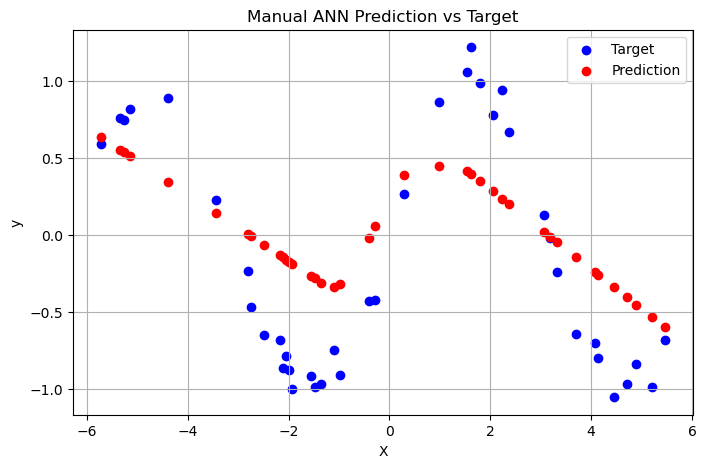

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(scaler_x.inverse_transform(X_test), y_test, color='blue', label='Target')
plt.scatter(scaler_x.inverse_transform(X_test), y_pred_test, color='red', label='Prediction')
plt.title("Manual ANN Prediction vs Target")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Interpretation
* The general sine pattern is still captured by the model, but there are large deviations in some areas, particularly at the peaks and valleys of the curve.
* The model tends to smooth the predictions, so extreme variations in the data (due to noise or the original sine shape) are not fully captured.
* Prediction errors appear larger in areas of rapid transition (e.g., around x ≈ −5, x ≈ 2, and x ≈ 4).
* This is consistent with previous metrics (R² = 0.544 and high MAPE), indicating that this simple model only partially captures the pattern but is less able to model the full variation of the data.

# ANN with Keras - Regression (Dataset: Diabetes)
Building an Artificial Neural Network model using Keras to predict diabetes disease progression based on 10 medical features, using a regression approach.

## Load diabetes data
Retrieves the Diabetes dataset from `sklearn.datasets`. This dataset contains features such as age, BMI, blood pressure, and biochemical measurements used to predict disease progression.

In [40]:
data = load_diabetes()
X = data.data
y = data.target

In [41]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [42]:
X.flatten()

array([ 0.03807591,  0.05068012,  0.06169621, ..., -0.03949338,
       -0.00422151,  0.00306441])

In [43]:
y.flatten()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## Split and scale data
Split the data into a training set and a test set (e.g., 80:20). Then, normalize using StandardScaler to ensure all features have comparable scales, resulting in more stable ANN training.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ANN model for regression
Building a neural network architecture with 1 input layer, 2 hidden layers (64 neurons & 32 neurons, ReLU activation), and 1 output neuron to predict continuous values.

In [45]:
model_reg = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)), 
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # output 1 neuron for regression
])

## Regression Model Learning
Train the model using the Adam optimizer and the MSE loss function. This process adjusts the network weights to minimize the error between the prediction and the target.

In [46]:
model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_reg = model_reg.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)

## Evaluation
Evaluate model performance with test data to see how well the model generalizes to new data.

In [47]:
mse, mae = model_reg.evaluate(X_test, y_test, verbose=0)

In [48]:
print(f"MSE: {mse:.4f}, \nMAE: {mae:.4f}")

MSE: 3016.2910, 
MAE: 44.4712


* MSE = 3016.29 → The mean squared error is still quite large, indicating that the difference between the prediction and the target varies quite widely.
* MAE = 44.47 → The average prediction is off by about 44 points from the target value.

## Loss Plot
Displays a graph of the loss decrease over training epochs. This graph shows how the error decreases with increasing training iterations.

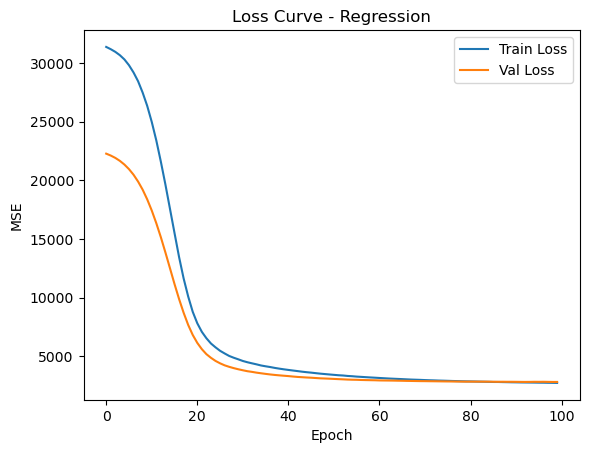

In [49]:
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Val Loss')
plt.title("Loss Curve - Regression")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

### Interpretation
* Train Loss and Val Loss both decrease sharply at the beginning of epochs (0–20), indicating the model is quickly learning the underlying patterns of the data.
* After around the 40th epoch, the loss decline slows and begins to stabilize, indicating the model is approaching convergence.
* Val Loss is slightly lower than Train Loss for most epochs, which could be due to the regularization effect of the validation data or batch fluctuations.
* There are no obvious signs of overfitting (Val Loss does not increase at the end of training), indicating the model is quite stable.

## Prediction

In [50]:
y_pred_test = model_reg.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


## Evaluation metrics

In [51]:
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [52]:
print(f"MSE Test : {mse_test:.4f}")
print(f"MAE Test : {mae_test:.4f}")
print(f"MAPE Test: {mape_test:.2f}%")
print(f"R² Test  : {r2_test:.4f}")

MSE Test : 3016.2912
MAE Test : 44.4712
MAPE Test: 0.39%
R² Test  : 0.4307


### Interpretation
* MSE = 3016.29 → The mean squared error is quite large, indicating that predictions often miss the target value at the diabetes dataset scale.
* MAE = 44.47 → The average prediction misses the actual target value by about 44 points.
* MAPE = 0.39% → The percentage error relative to the target value is very small; this seems inconsistent with the magnitude of the MAE, likely because the target value in the dataset is large, making the percentage error appear small.
* R² = 0.4307 → The model only explains about 43.07% of the variation in the data, with the remainder unexplained by the model.

## Target-prediction comparison table
Create a table comparing the actual target value with the predicted result, including errors.

In [53]:
df_eval = pd.DataFrame({
    'y_target': y_test,
    'y_prediction': y_pred_test.flatten(),
    'error': y_test - y_pred_test.flatten(),
})

In [54]:
df_eval.head()

,y_target,y_prediction,error
0,219.0,168.725327,50.274673
1,70.0,181.413879,-111.413879
2,202.0,147.275620,54.724380
3,230.0,321.422333,-91.422333
4,111.0,88.561729,22.438271


### Interpretation
The model produces significant errors at several points, both overestimating and underestimating, indicating that the predictions are not yet stable across the target value range. There are indications that the model still has difficulty capturing patterns at extreme values (very high or very low).

## Prediction vs. Target Plot
Creates a scatterplot between the target and predicted values. The red diagonal line indicates perfect prediction. The closer the points are to this line, the better the model's accuracy.

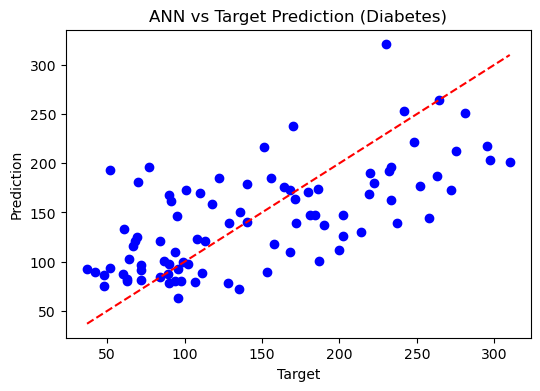

In [55]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('ANN vs Target Prediction (Diabetes)')
plt.show()

### Interpretation
* The dashed red line is the ideal line where prediction = target (error = 0).\
The closer the blue dots are to this line, the more accurate the model.
* Most of the dots fall around the line, but many are quite spread out, especially in the high and low target values, indicating large errors at the extremes of the data.
* The wide spread of the dots indicates that the model has not been able to precisely map the input-output relationship.
* There are indications that the model tends to compress the prediction range (low values are slightly overpredicted, high values are slightly underpredicted), a common pattern in underfitting regression models.

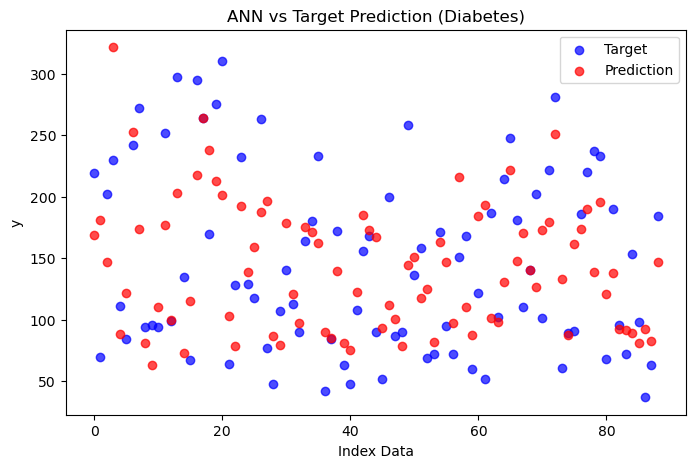

In [56]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Target', alpha=0.7)
plt.scatter(range(len(y_pred_test)), y_pred_test, color='red', label='Prediction', alpha=0.7)
plt.xlabel('Index Data')
plt.ylabel('y')
plt.title('ANN vs Target Prediction (Diabetes)')
plt.legend()
plt.show()

### Interpretation
* The pattern of red dots tends to follow the general trend of the blue dots, indicating that the model partially captures the relationship between the feature and the target.
* However, there is a significant spread between the predicted and target values at many points, especially at very high or very low target values, indicating significant prediction error in some of the data.
* The red dots often fall in the middle of the range, indicating model underfitting, meaning the predictions are "pulled" toward the mean rather than truly following the extreme variations in the data.
* Visually, the predictions appear "tighter" than the wider distribution of the target data, reinforcing the notion that the model is less able to predict extreme cases.

# ANN with Keras - Binary Classification (Dataset: make_moons)
Building a simple artificial neural network model to separate two classes on the synthetic dataset make_moons, which has a curved and intertwined distribution pattern.

## Load dataset
Generates a two-dimensional synthetic dataset using `make_moons` from `sklearn.datasets` with a noise parameter to add variety to the data.

In [57]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

## Split data
Divide the data into a training set and a testing set so that the model can be tested on previously unseen data.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling data
Normalize features using `StandardScaler` to ensure each feature has a comparable scale, aiding model training convergence.

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Binary classification model
Developing an ANN architecture using Keras Sequential with two hidden layers with ReLU activation and one output layer with sigmoid activation to generate class probabilities.

In [60]:
model_clf_bin = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)), 
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

## Classification model learning
Training a model using binary crossentropy as the loss function and the Adam optimizer, while monitoring accuracy on validation data at each epoch.

In [61]:
model_clf_bin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bin = model_clf_bin.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)

## Evaluation
Calculate loss and accuracy values on the testing data to assess the model's performance after learning.

In [62]:
loss, acc = model_clf_bin.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9750


### Interpretation
An accuracy of 0.9750 means the model was able to correctly classify the test data 97.5% of the time, indicating excellent performance on this dataset.

## Accuracy Plot
Displays a graph of the training and validation accuracy progression per epoch to see learning stability and trends.

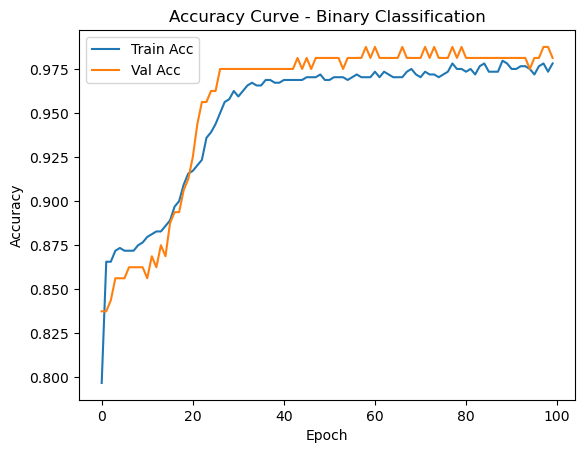

In [63]:
plt.plot(history_bin.history['accuracy'], label='Train Acc')
plt.plot(history_bin.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve - Binary Classification")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Interpretation
* The accuracy curve shows that this binary classification model experiences a consistent performance increase early in training, with both training and validation accuracies rising sharply until around the 20th epoch.
* After that, they approach ~98% and stabilize, with the training (blue) and validation (orange) lines nearly overlapping. This indicates the model is learning well without significant overfitting, as performance on the validation data does not decline even after training continues until the 100th epoch.
* Overall, this indicates that the architecture and hyperparameters used are effective in separating classes on the make_moons dataset with a very low error rate.

## Prediction
Generates a predicted probability on the testing data, then converts it to a binary label (0 or 1) based on a threshold of 0.5.

In [64]:
y_pred_prob = model_clf_bin.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [65]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1])

## Evaluation metrics
Calculate accuracy, precision, recall, and F1-score metrics to quantitatively assess model performance.

In [66]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [67]:
print(f"Accuracy     : {acc:.4f}")
print(f"Precision   : {prec:.4f}")
print(f"Recall      : {rec:.4f}")
print(f"F1-score    : {f1:.4f}")

Accuracy     : 0.9750
Precision   : 0.9798
Recall      : 0.9700
F1-score    : 0.9749


### Interpretation
* An accuracy of 97.50% indicates that almost all of the test data (97.5 out of every 100 samples) was correctly classified. This reflects the model's good generalization ability to unseen data.
* A precision of 97.98% means that of all positive predictions the model made, only about 2% were incorrect. This is especially important when the risk of false positives is high, as the model rarely generates false alarms.
* A recall of 97.00% indicates that the model successfully captured almost all of the true positive cases in the data, missing only about 3% of the total positive cases. This is crucial in contexts where missing positive cases is more dangerous.
* An F1-score of 97.49% is nearly equal for precision and recall, indicating that there is no significant imbalance between the two, and that the model maintains a balance between avoiding false positives and false negatives.

## Target vs. Prediction Comparison Table
Shows a comparison between the actual and predicted labels for a sample of testing data to see how the results match.

In [68]:
df_eval = pd.DataFrame({
    'y_target': y_test,
    'y_prediction': y_pred,
    'predict_prob': y_pred_prob.flatten()
})

In [69]:
df_eval.head()

,y_target,y_prediction,predict_prob
0,1,1,0.994613
1,0,0,0.000954
2,1,1,0.997109
3,0,0,0.000078
4,1,1,0.999978


## Classification report
Presents a summary of evaluation metrics per class, including precision, recall, F1-score, and the number of samples per class.

In [70]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.98      0.97      0.97       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



### Interpretation
* Class 0 → precision of 0.97 and recall of 0.98 means the model rarely mispredicts class 0 and is able to capture almost all true class 0 data.
* Class 1 → precision of 0.98 and recall of 0.97 shows comparable results, only slightly different from class 0.
* A total accuracy of 97% indicates that out of 200 test data sets, only about 6 were misclassified.
* The macro average and weighted average are nearly identical (≈0.98 precision, 0.97 recall, 0.97 F1), indicating a balanced distribution of data between classes and consistent model performance across both classes.
* In short, the model is not biased toward either class and is able to provide accurate and balanced predictions with a very low error rate.

## Confusion matrix
Shows the number of correct and incorrect predictions for each class in matrix form, and is visualized as a heatmap for easier interpretation.

In [71]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[98  2]
 [ 3 97]]


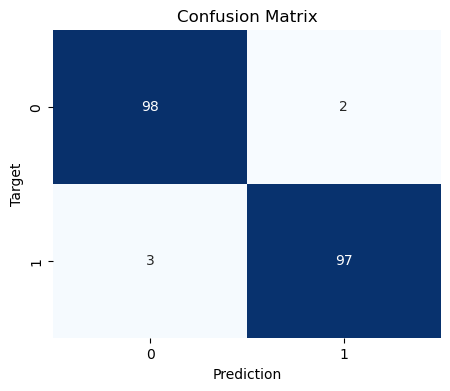

In [72]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.title("Confusion Matrix")
plt.show()

### Interpretation
* Of the 100 actual class 0 data sets, 98 were correctly predicted as class 0 (True Negative), and 2 were incorrectly predicted as class 1 (False Positive).
* Of the 100 actual class 1 data sets, 97 were correctly predicted as class 1 (True Positive), and 3 were incorrectly predicted as class 0 (False Negative).
* This means the model is very accurate, making only 5 errors out of a total of 200 predictions, and these errors are evenly distributed across classes, so there is no indication of significant bias.

## Decision Boundary
Visualizes the classification area learned by the model, where each color represents a specific class prediction, thus showing the class boundaries and the actual distribution of data points.

5460/5460 ━━━━━━━━━━━━━━━━━━━━ 5s 931us/step


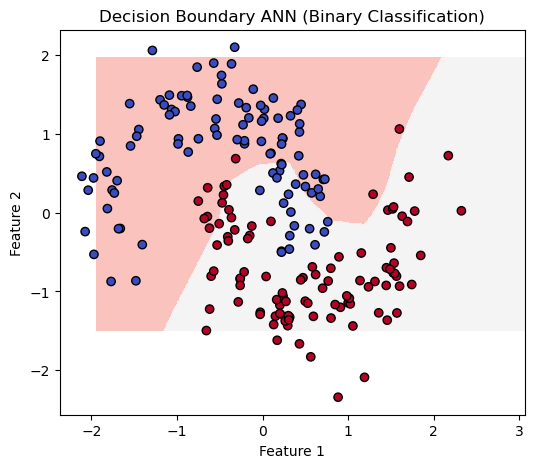

In [73]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model_clf_bin.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = (Z > 0.5).astype(int).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Decision Boundary ANN (Binary Classification)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Interpretation
* This plot shows how the ANN model separates the two classes in the make_moons dataset.
* The pink background color indicates the area predicted as class 1, while the light gray color indicates the area predicted as class 0.
* The blue dots represent the target class 0 data, and the dark red dots represent the target class 1 data.
* The decision boundary appears curved and follows the pattern of the data, demonstrating the ANN's ability to capture non-linear relationships.
* While most of the points fall in the correct area, a few fall in the opposite class area, indicating prediction errors, especially near the decision boundary.
* This is understandable given the convoluted and overlapping distribution of the make_moons data.

# ANN with Keras - Multi-Class Classification (Dataset: Iris)
Creating a Keras-based artificial neural network model to classify iris flowers into three species based on the length and width of petals and sepals.

## Load dataset
Loads the Iris dataset available in scikit-learn, containing 150 samples with 4 numeric features and class labels of 0, 1, or 2.

In [2]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

## Encoding
Converts the class labels (0, 1, 2) into a one-hot encoded format for use in multi-class models, where each class is represented as a binary vector.

In [3]:
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y).toarray()

## Split data
Divide the data into a training set and a test set to separate the data used to build the model and to evaluate it.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Data Scaling
Standardizing features to have a distribution with a mean of 0 and a standard deviation of 1 helps the ANN model learn more effectively.

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Multi-class Model
Building an ANN architecture with Keras for multi-class classification, using Dense layers with ReLU activation in the hidden layer and Softmax in the output layer to generate probabilities for each class.

In [6]:
model_clf_multi = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)), 
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

## Multi-class model learning
Train a model on the training data with the `categorical_crossentropy` loss function and an optimizer like Adam, while monitoring accuracy on the training and validation data.

In [7]:
model_clf_multi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_multi = model_clf_multi.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)

## Evaluation
Measure the model's performance on test data using metrics such as accuracy to see how well the model classifies data it has never seen before.

In [8]:
loss, acc = model_clf_multi.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9667


An accuracy of 0.9667 means that the model successfully predicted approximately 96.67% of all samples in the test data, indicating excellent classification performance.

## Accuracy Plot
Visualizes the development of model accuracy during the training process to see patterns of performance improvement and indications of overfitting or underfitting.

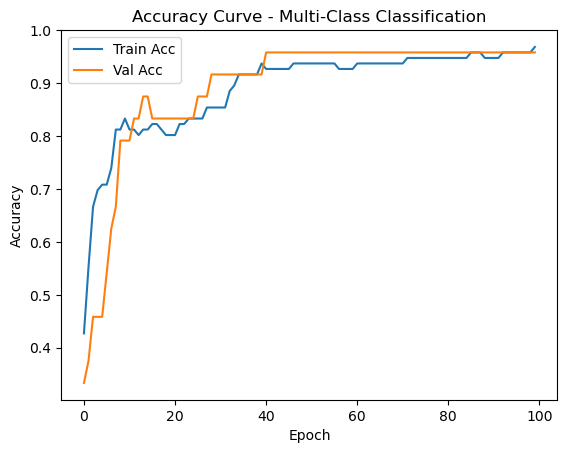

In [9]:
plt.plot(history_multi.history['accuracy'], label='Train Acc')
plt.plot(history_multi.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve - Multi-Class Classification")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Interpretation
* Early training (epochs < 20):\
Training and validation accuracy increased rapidly, from around 0.33 to the 0.85–0.88 range, indicating the model quickly captured basic patterns in the data.
* Mid-training (epochs 20–60):\
Validation accuracy reached around 0.95 faster than training, then stabilized high with little fluctuation. The training curve continued to climb slowly, indicating the refinement of the model weights.
* End of training (epochs > 60):\
Training accuracy approached 0.97–0.98, while validation accuracy remained consistently in the same range, with no significant drop. There was no indication of severe overfitting, only a small, but normal, difference between the two curves.
* Overall, the model learned efficiently, maintaining a balance between accuracy on the training and validation data, thus maintaining its generalization ability.

## Prediction

In [10]:
y_pred_proba = model_clf_multi.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  # because y_test is already one-hot encoded

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


## Evaluation metrics

In [11]:
acc = accuracy_score(y_test_classes, y_pred_classes)
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Interpretation
* This classification report shows excellent model performance across all three classes (0, 1, and 2) in the Iris dataset.
* Class 0 was perfectly predicted with a precision, recall, and f1-score of 1.00.
* Class 1 had a precision of 1.00 but a slightly lower recall (0.89), indicating that a small percentage of class 1 samples were misclassified into another class.
* Class 2, on the other hand, had a perfect recall (1.00) but the precision dropped slightly to 0.92, indicating that some class 2 samples were predicted to belong to another class.
* The overall accuracy reached 0.97, meaning that 29 out of 30 samples in the test data were correctly classified.
* The macro average and weighted average were both high (~0.97), indicating stable performance across all classes with no dominance in any particular class.
* In other words, the model was able to recognize patterns between classes very well, although there were still small errors in classes 1 and 2.

## Confusion Matrix

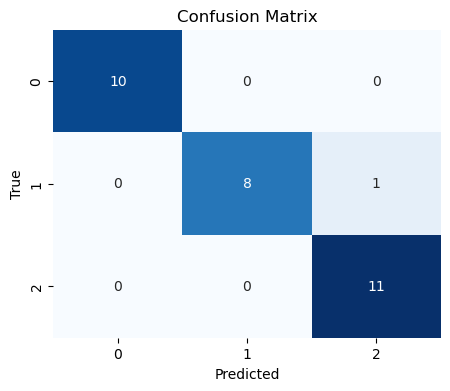

In [12]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=encoder.categories_[0],
            yticklabels=encoder.categories_[0])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Interpretation
* This confusion matrix shows the performance of a multi-class classification model on the Iris dataset, with near-perfect results.
* Class 0 → All 10 samples were successfully predicted as class 0 (no errors).
* Class 1 → Of the 9 samples, 8 were correctly predicted as class 1, while 1 sample was incorrectly predicted as class 2.
* Class 2 → All 11 samples were successfully predicted as class 2 (no errors).
* There was only 1 misprediction across the entire test data, seen in the class 1 row.
* High values on the main diagonal indicate that the model is very good at recognizing the patterns of each class, although there is some confusion between class 1 and class 2.

## Target and prediction comparison table

In [13]:
df_eval = pd.DataFrame({
    'Target': y_test_classes,
    'Prediction': y_pred_classes
})

In [14]:
df_eval

,Target,Prediction
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,2
9,1,1


## Prediction and target plots

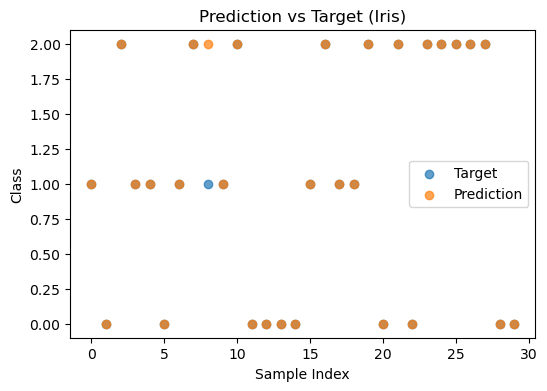

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test_classes)), y_test_classes, label="Target", alpha=0.7)
plt.scatter(range(len(y_pred_classes)), y_pred_classes, label="Prediction", alpha=0.7)
plt.legend()
plt.title("Prediction vs Target (Iris)")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.show()

### Interpretation
* This Prediction vs. Target plot shows the comparison between the actual classes (blue) and the model-predicted classes (orange) on the Iris dataset.
* Nearly all predicted points (orange) perfectly overlap with the target (blue), indicating the model predicted with very high accuracy.
* There is only one non-overlapping point, seen in class 1 (blue label), which was predicted as class 2 (orange label).
* The class distribution pattern is neat, indicating the data is well-separated enough for the model to learn it well.
* Overall, this plot confirms that the model is nearly perfect at recognizing the patterns of each class, with very minimal errors.

## Conclusion
The final results of this project demonstrate the flexibility and power of ANNs in learning data patterns, for both binary and multi-class classification. In the make_moons case, the model achieved high accuracy despite the complex distribution of the data, while on the Iris dataset, the model achieved excellent performance on the test data, with no misclassifications. Visualizations such as the accuracy curve, decision boundary, and prediction vs. target not only highlight the model's performance but also provide an intuitive understanding of how the ANN makes decisions.

This project not only demonstrated the ANN's ability to solve classification problems but also provided a comprehensive understanding of the machine learning workflow, from data preparation to result interpretation. In the future, similar models can be developed for more complex datasets, adding layers or neurons to increase capacity, or combining them with regularization techniques to address potential overfitting. With this foundation, the next step is to expand the application of ANNs to various real-world domains that require intelligent, data-driven decisions.

# Thank You